In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [10]:
from sklearn.datasets import load_diabetes

data = load_diabetes()
print (data ['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data['data']
y = data ['target']

X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print (X_train.shape)

(353, 10)


10 değişkenin(nöron) 128 nörona sahip girdi katman(10 inputlu 128 nöronlu katman) oluşturuluyor ve 64 nörünluk gizli katmanı oluşturuluyor ve son olarak 1 çıkış veren nöron kuruluyor.

**"This code creates a regression model with 10 inputs, two hidden layers (one with 128 neurons and one with 64 neurons), and one output, trains it using the Adam optimization algorithm and MSE loss function, and evaluates it using the MAPE metric."**

In [12]:
mdl = keras.Sequential()
mdl.add(layers.Dense(128,activation = 'relu',input_shape = (X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42))))
mdl.add (layers.Dense(64, activation = 'relu'))
mdl.add (layers.Dense(1, activation = 'linear'))

mdl.compile(optimizer = 'adam', loss ='mse', metrics = ['mape'])
mdl.fit(X_train,y_train, epochs =10)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 28950.1914 - mape: 99.8733 
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29443.6895 - mape: 98.5196  
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28971.5840 - mape: 96.8654 
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 27704.1309 - mape: 94.5412 
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25235.0527 - mape: 90.9556 
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24056.8848 - mape: 86.5006 
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 22116.8613 - mape: 80.2512 
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19785.9434 - mape: 72.1364 
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17161.9648 - mape: 64.4979 
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13562.1475 - mape: 53.7983 
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9179.5508 - mape: 44.1290 
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step -

**"To see its performance on the test data;"**

In [13]:
mdl.evaluate(X_test,y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2928.2422 - mape: 34.9031 


[2776.0791015625, 35.27595138549805]

**"Generating model prediction values;"**

In [14]:
ypred = mdl.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


**"Classification problem in Deep Learning"**

In [15]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer ()

X = data.data
y = data.target

print (data.DESCR)



.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [16]:
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print (X_train.shape)

(455, 30)


In [17]:
mdl = keras.Sequential()
mdl.add(layers.Dense(128,activation = 'relu',input_shape=(X_train.shape[1],)))
mdl.add (layers.Dense(64, activation = 'relu'))
mdl.add (layers.Dense(1, activation = 'sigmoid'))

mdl.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics = ['accuracy'])
mdl.fit(X_train,y_train, epochs =100)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7438 - loss: 0.5452
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9356 - loss: 0.2135
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9562 - loss: 0.1258 
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9830 - loss: 0.0841 
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9885 - loss: 0.0666 
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9851 - loss: 0.0581 
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9876 - loss: 0.0473 
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9829 - loss: 0.0470 
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9857 - loss: 0.0391 
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9897 - loss: 0.0509 
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9841 - loss: 0.0498 
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.

**"Predicting 0-1 in the output layer."**

In [18]:
mdl.evaluate(X_test,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9651 - loss: 0.2175  


[0.1647830605506897, 0.9649122953414917]

In [19]:
ypred = mdl.predict(X_test)
ypred_label = (ypred > 0.5).astype('int')
ypred_label

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
    

**"Multi-class classification (for more than two classes)"**


In [20]:
from sklearn.datasets import load_iris

data = load_iris()

X = data.data
y = data.target

print (data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [21]:
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print (X_train.shape)


(120, 4)



**"The output layer should have as many neurons as there are classes. For the activation function, sigmoid can be used. However, we can also express it probabilistically. If we calculate the probability of a risk belonging to each class, the softmax activation function is used to ensure that their sum equals 1."**

Çıktı katmanında kaç tane sınıfın varsa o kadar nöron olmalı.
aktivasyon fonk için ,sigmoid kullanılabilir. ancak olasılıksal olarakta ifade edebiliriz..bir riskın her bir sınıfa ait olma olasılığını hesaplasak..toplamları 1 e eşit olmas için soft max aktivasyon fonk kullanılır.

In [22]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

**"sparse_categorical_crossentropy is used when categorical data consists of 0-1 values."**


In [23]:
mdl = keras.Sequential()
mdl.add(layers.Dense(128,activation = 'relu',input_shape=(X_train.shape[1],)))
mdl.add (layers.Dense(64, activation = 'relu'))
mdl.add (layers.Dense(3, activation = 'softmax'))

mdl.compile(optimizer = 'adam', loss ='sparse_categorical_crossentropy', metrics = ['accuracy'])
mdl.fit(X_train,y_train, epochs =100)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6540 - loss: 1.0004
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7300 - loss: 0.8538 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7685 - loss: 0.7544
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8060 - loss: 0.6816
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8183 - loss: 0.6134
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8298 - loss: 0.5374
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7975 - loss: 0.5071
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8329 - loss: 0.4427
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8269 - loss: 0.4093
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8300 - loss: 0.3859 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8592 - loss: 0.3409
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8179 - loss: 0.3503

3 vektörden hngi sınıfa ait olduğunu anlamak için,hangi indexteki olasılık en büyükse o sınıfa atayacağız..

**"To determine which class a 3-vector belongs to, we will assign it to the class with the highest probability at the corresponding index."**



In [27]:
ypred = mdl.predict(X_test)
ypred_label =np.argmax(ypred, axis= 1)
ypred_label


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [28]:
mdl.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,275 (106.55 KB)

 Trainable params: 9,091 (35.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 18,184 (71.04 KB)

modelin overfit tespit etmek için;
model çok fazla eğitilirse ,datalar girdi çıktı arasındaki ilşkiyi öğrenmekten çok ezberlemeye başlar.Ne kadar süre iterasyon eğiticeğimize karar vermemiz gerekir.

**"To detect overfitting in a model; if the model is trained too much, it starts to memorize the data rather than learning the relationship between inputs and outputs. We need to decide how long to train the iterations."**

In [37]:
from sklearn.datasets import load_diabetes

data = load_diabetes()
print (data ['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data['data']
y = data ['target']

X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print (X_train.shape)

(353, 10)


In [51]:
mdl = keras.Sequential()
mdl.add(layers.Dense(512,activation = 'relu',input_shape=(X_train.shape[1],)))
mdl.add (layers.Dense(512, activation = 'relu'))
mdl.add (layers.Dense(512, activation = 'relu'))
mdl.add (layers.Dense(512, activation = 'relu'))
mdl.add (layers.Dense(1, activation = 'linear'))

mdl.compile(optimizer = 'adam', loss ='mse', metrics = ['mape'])
history = mdl.fit(X_train, y_train, epochs =1000, verbose=0, validation_split=0.1 )

mdl.evaluate(X_train,y_train)
mdl.evaluate(X_test,y_test )



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 139.0202 - mape: 3.6968
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4016.6812 - mape: 40.4211


[4084.087890625, 43.3341178894043]

Genel Değerlendirme: Bu sonuçlar da aynı şekilde aşırı öğrenme (overfitting) problemini gösteriyor, fakat eğitim verisindeki başarı daha da artmış.

**"Overall Evaluation: These results also indicate an overfitting problem, but the success on the training data has increased even further."**


(0.0, 100.0)

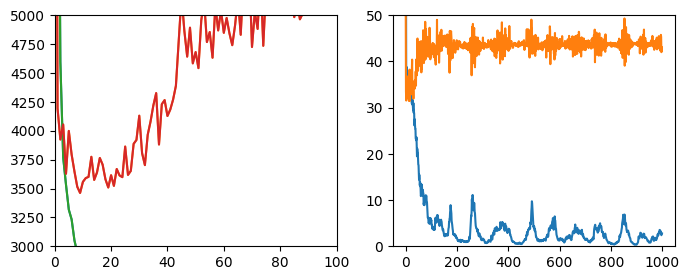

In [62]:
plt.figure(figsize=(8,3))

plt.subplot(1,2,1)
plt.plot(history.history ['loss'])
plt.plot(history.history ['val_loss'])
plt.ylim([0,10000])

plt.subplot(1,2,2)
plt.plot(history.history ['mape'])
plt.plot(history.history ['val_mape'])
plt.ylim([0,50])

plt.subplot(1,2,1)
plt.plot(history.history ['loss'])
plt.plot(history.history ['val_loss'])
plt.ylim([3000,5000])
plt.xlim([0,100])


Önemli Notlar:

Modelinizi her zaman eğitim ve test verisi üzerinde değerlendirin.
Aşırı öğrenmeyi önlemek için düzenlileştirme tekniklerini kullanın.
Modelinizi yavaş yavaş karmaşıklaştırın ve performansını izleyin.
validation_split parametresi ile verinizin bir kısmını doğrulama verisi olarak ayırıp, eğitim boyunca modelinizin doğrulama verisi üzerindeki performansını gözlemleyebilirsiniz.

**Important Notes:**

**Always evaluate your model on both training and test data.
Use regularization techniques to prevent overfitting.
Gradually increase the complexity of your model and monitor its performance.
With the validation_split parameter, you can set aside a portion of your data as validation data and observe your model's performance on the validation data throughout training."**

Model çok fazla eğitilince örüntüyü öğrenmek yerine datayı ezberlemeye başlıyor.Datayı ezberlemeye başlayınca da test datası üstünde (görmediği data üstünde)kötü bir sonuç almasına sebep oluyor.

**"When the model is trained too much, instead of learning the pattern, it starts memorizing the data. When it starts memorizing the data, it causes it to get a bad result on the test data (on the unseen test data)."**

Early_Stopping_Metodu=>her bir itarasyonda validasyon datasını gözlemle,validasyon datasında kötüye gitmeye başladığı an eğitimi durdur.

**"Early Stopping Method => observe the validation data in each iteration, stop training the moment it starts to deteriorate in the validation data."**

In [65]:
mdl = keras.Sequential()
mdl.add(layers.Dense(512,activation = 'relu',input_shape=(X_train.shape[1],)))
mdl.add (layers.Dense(512, activation = 'relu'))
mdl.add (layers.Dense(512, activation = 'relu'))
mdl.add (layers.Dense(512, activation = 'relu'))
mdl.add (layers.Dense(1, activation = 'linear'))

early_stop =keras.callbacks.EarlyStopping(monitor ='val_loss',patience=50,
                                          restore_best_weights=True)

mdl.compile(optimizer = 'adam', loss ='mse', metrics = ['mape'])
history = mdl.fit(X_train, y_train, epochs =1000, verbose=0, validation_split=0.1 ,
                                    callbacks =[early_stop])

mdl.evaluate(X_train,y_train)
mdl.evaluate(X_test,y_test )

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1951.0363 - mape: 29.0125 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2850.6157 - mape: 33.7562


[2704.3046875, 34.5792121887207]

(0.0, 50.0)

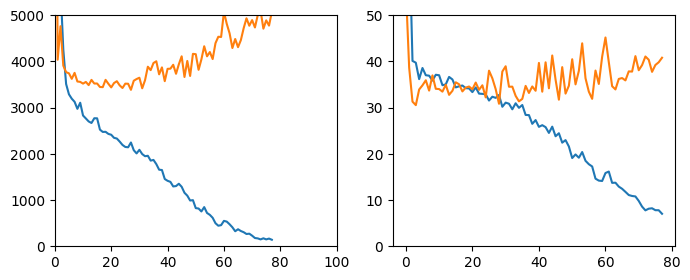

In [66]:
plt.figure(figsize=(8,3))

plt.subplot(1,2,1)
plt.plot(history.history ['loss'])
plt.plot(history.history ['val_loss'])
plt.ylim([0,5000])
plt.xlim([0,100])

plt.subplot(1,2,2)
plt.plot(history.history ['mape'])
plt.plot(history.history ['val_mape'])
plt.ylim([0,50])

Bu şekilde overfitting engellemek için earlystopping metodu kullanılmıştır.

**"The early stopping method was used to prevent overfitting in this way."**